In [1]:
import numpy as np
from source.coordinate_descent import CoordinateDescent

from source.utils.load_data import get_high_dimensional_artificial_ds
from sklearn.datasets import load_diabetes, load_boston

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt

# Artificially generated high-dimensional dataset
## Loading Data

In [2]:
X_diab, y_diab = load_diabetes(return_X_y=True)
#X, y = load_boston(return_X_y=True)

y_diab = y_diab.reshape((-1, 1))
X_diab = np.hstack([np.ones(X_diab.shape[0]).reshape((X_diab.shape[0], 1)), X_diab])


# normalization
X_diab = X_diab / (np.linalg.norm(X_diab, axis=0))
y_diab = y_diab / (np.linalg.norm(y_diab, axis=0))

In [3]:
X_bost, y_bost = load_boston(return_X_y=True)

y_bost = y_bost.reshape((-1, 1))
X_bost = np.hstack([np.ones(X_bost.shape[0]).reshape((X_bost.shape[0], 1)), X_bost])


# normalization
X_bost = X_bost / (np.linalg.norm(X_bost, axis=0))
y_bost = y_bost / (np.linalg.norm(y_bost, axis=0))

## Lasso Regression with our implementation of Coordinate Descent algorithm

**Diabetes dataset**

In [4]:
lambda_ = 0.01
cd_diab = CoordinateDescent(lambda_ = lambda_)
cd_diab.fit(X_diab, y_diab, tol = 10e-6, method='greedy')

  9%|▊         | 87/1000 [00:00<00:00, 1003.80it/s]


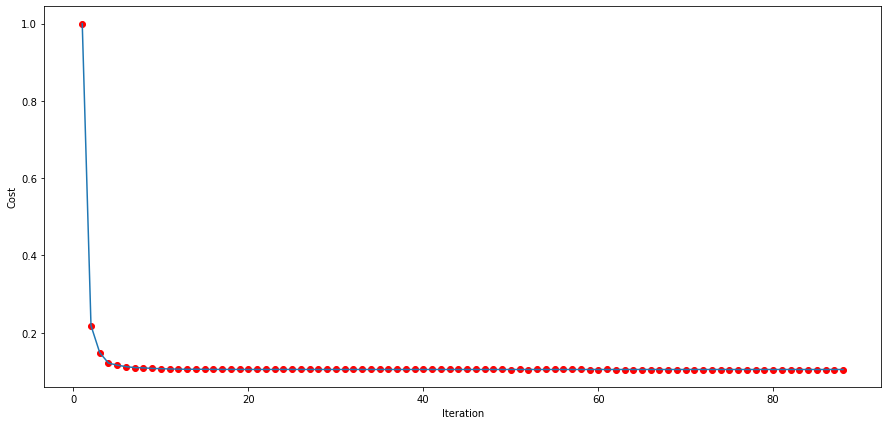

In [5]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1, cd_diab.costs.shape[0]+1), cd_diab.costs, 'o', color = 'red')
plt.plot(range(1, cd_diab.costs.shape[0]+1), cd_diab.costs, '-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

**Boston**

In [6]:
lambda_ = 0.05
cd_bost = CoordinateDescent(lambda_ = lambda_)
cd_bost.fit(X_bost, y_bost, tol = 10e-4, method='greedy')

  6%|▌         | 62/1000 [00:00<00:01, 684.60it/s]


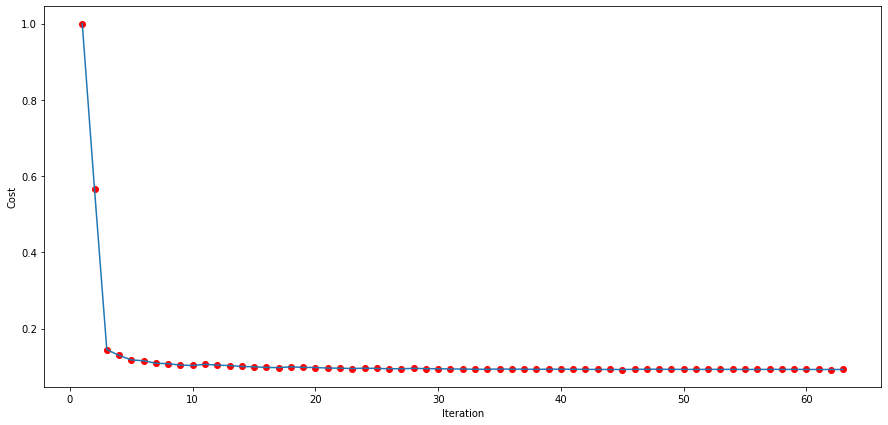

In [7]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1, cd_bost.costs.shape[0]+1), cd_bost.costs, 'o', color = 'red')
plt.plot(range(1, cd_bost.costs.shape[0]+1), cd_bost.costs, '-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()